# <center> Comparison with the literature </center>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('final_estimations.csv').sort_values(by='karmn')
mdwarfs = pd.read_csv('mdwarfs_data.csv').sort_values(by='karmn')

karmn = data['karmn'].values
teff_carm_pred = data['Teff']
mh_carm_pred = data['[M/H]']
logg_carm_pred = data['logg']
vsini_carm_pred = data['vsini']
vsini_err1 = data['e_vsini']
vsini_err2 = data['E_vsini']

In [3]:
# We load the literature

# Interferometry
interf_idx = ['J00183+440','J04429+189','J05314-036','J09143+526','J09144+526','J11033+359','J11054+435',
             'J11421+267','J13457+148','J15194-077','J16581+257','J17578+046','J22532-142','J22565+165']

teff_interf = np.array([3658,3717,3843,4087,3968,3571,3411,3446,3642,3501,3610,3252,3165,3713])

karmn_interf = karmn[np.isin(karmn,interf_idx)]
teff_interf_pred = teff_carm_pred[np.isin(karmn,interf_idx)]

# FGK+M stars
spec_idx = ['J02362+068','J04153-076','J05415+534','J07361-031','J08526+283','J14251+518']
mh_spec = np.array([-0.2,-0.37,0.04,-0.11,0.29,-0.09])

karmn_spec = karmn[np.isin(karmn,spec_idx)]
mh_spec_pred = mh_carm_pred[np.isin(karmn,spec_idx)]

# DL
dl_df  = pd.read_csv('literature_data/dl.csv',usecols=['KARMN','TEFF_MODE','LOGG_MODE','ZETA_MODE','VSINI_MODE','VSINI_Q16','VSINI_Q84'])
dl_df['vsini_err1'] = dl_df['VSINI_MODE'] - dl_df['VSINI_Q16']
dl_df['vsini_err2'] = dl_df['VSINI_Q84'] - dl_df['VSINI_MODE']
dl_df = dl_df.dropna().sort_values(by='KARMN')
dl_carm = dl_df[dl_df['KARMN'].isin(karmn)].reset_index(drop=True)
for i, el in enumerate(dl_carm['KARMN']):    
    if el != karmn[i]:
        print('Error in DL, check index',i,el)
        
teff_dl = dl_carm['TEFF_MODE']
logg_dl = dl_carm['LOGG_MODE']
mh_dl = dl_carm['ZETA_MODE']
vsini_dl = dl_carm['VSINI_MODE']
e_vsini_dl = dl_carm[['vsini_err1','vsini_err2']]

# DTL
dtl_df = pd.read_csv('literature_data/dtl.csv')
dtl_carm = dtl_df[dtl_df['KARMN'].isin(karmn)].reset_index(drop=True)
idx_rem = []
for el in karmn:
    if el not in dtl_df['KARMN'].values:
        idx_rem.append(el)    
        
karm_dtl = karmn[~np.isin(karmn,idx_rem)]
teff_pred_dtl = teff_carm_pred[~np.isin(karmn,idx_rem)]
mh_pred_dtl = mh_carm_pred[~np.isin(karmn,idx_rem)]

for i, el in enumerate(dtl_carm['KARMN']):    
    if el != karm_dtl[i]:
        print('Error, check index',i,el)      

teff_dtl = dtl_carm['TEFF_MODE']   
mh_dtl = dtl_carm['ZETA_MODE']   

# Mar21
mar21_df = pd.read_csv('literature_data/mar21.csv',usecols=['Karmn','Teff1','logg1','Corr1','vsini','e_vsini'])
mar21_df['Karmn'] = mar21_df['Karmn'].str.strip()
mar21_df['Karmn'] = mar21_df.Karmn.replace('J11110+304W','J11110+304')
mar21_carm = mar21_df[mar21_df['Karmn'].isin(karmn)].reset_index(drop=True)
for i, el in enumerate(mar21_carm['Karmn']):    
    if el != karmn[i]:
        print('Error in Mar21, check index',i,el)
        
teff_mar21 = mar21_carm['Teff1']                      
logg_mar21 = mar21_carm['logg1']                      
mh_mar21 = mar21_carm['Corr1']                      
vsini_mar21 = mar21_carm['vsini']    
e_vsini_mar21 = mar21_carm['e_vsini']                      

# Schw19
schw19_df = pd.read_csv('literature_data/schw19.csv',usecols=['Karmn','Teff','loggc','[Fe/H]'])
schw19_df = schw19_df.dropna().sort_values(by='Karmn')
schw19_df['Karmn'] = schw19_df['Karmn'].str.strip()
schw19_carm = schw19_df[schw19_df['Karmn'].isin(karmn)].reset_index(drop=True)
idx_rem = []
for el in karmn:
    if el not in schw19_df['Karmn'].values:
        idx_rem.append(el)
        
karmn_schw = karmn[~np.isin(karmn,idx_rem)]
teff_pred_schw19 = teff_carm_pred[~np.isin(karmn,idx_rem)]
logg_pred_schw19 = logg_carm_pred[~np.isin(karmn,idx_rem)]
mh_pred_schw19 = mh_carm_pred[~np.isin(karmn,idx_rem)]

for i, el in enumerate(schw19_carm['Karmn']):    
    if el != karmn_schw[i]:
        print('Error, check index',i,el)       
teff_schw19 = schw19_carm['Teff']
loggc_schw19 = schw19_carm['loggc']
mh_schw19 = schw19_carm['[Fe/H]']

# Pass19
pass19_df = pd.read_csv('literature_data/pass19.csv',usecols=['Karmn','TeffV','loggV','[Fe/H]V'])
pass19_df = pass19_df.dropna().sort_values(by='Karmn')
pass19_df['Karmn'] = pass19_df['Karmn'].str.strip()
pass19_carm = pass19_df[pass19_df['Karmn'].isin(karmn)].reset_index(drop=True)
idx_rem = []
for el in karmn:
    if el not in pass19_df['Karmn'].values:
        idx_rem.append(el)
        
karmn_pass = karmn[~np.isin(karmn,idx_rem)]
teff_pred_pass19 = teff_carm_pred[~np.isin(karmn,idx_rem)]
logg_pred_pass19 = logg_carm_pred[~np.isin(karmn,idx_rem)]
mh_pred_pass19 = mh_carm_pred[~np.isin(karmn,idx_rem)]

for i, el in enumerate(pass19_carm['Karmn']):    
    if el != karmn_pass[i]:
        print('Error, check index',i,el)       
teff_pass19 = pass19_carm['TeffV']
logg_pass19 = pass19_carm['loggV'] 
mh_pass19 = pass19_carm['[Fe/H]V']

## <center> Effective Temperature - Scatter Plots  (Figure 11) </center>

### CARMENES data

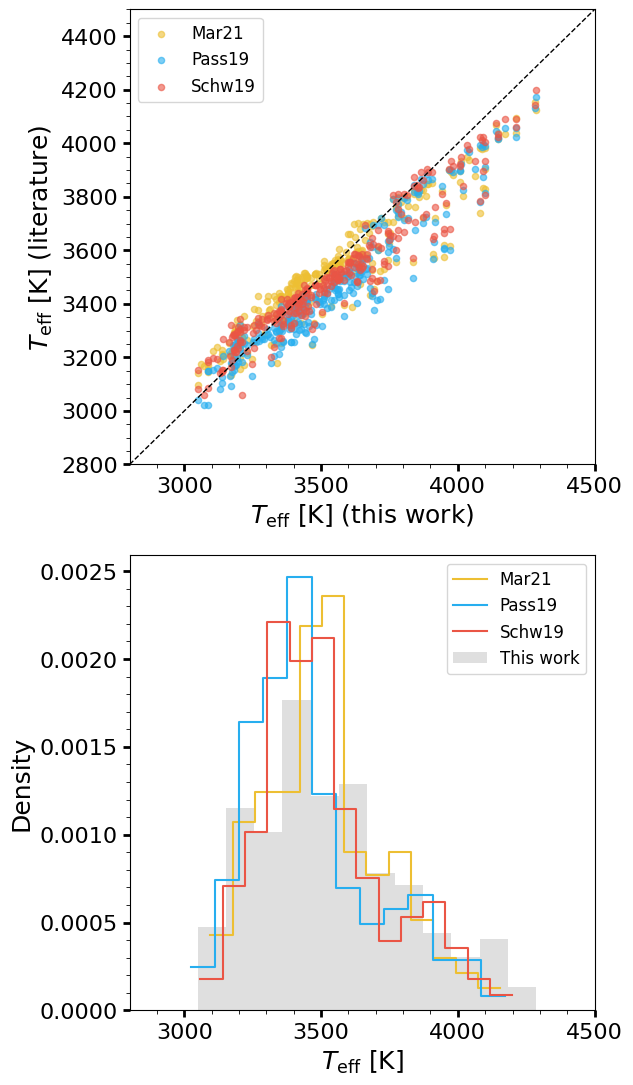

In [4]:
fig, (ax1, ax2) = plt.subplots(figsize=(6,13),nrows=2,ncols=1)

ax1.set_xlabel('$T_{\mathrm{eff}}$ [K] (this work)',fontsize=18)
ax1.set_ylabel('$T_{\mathrm{eff}}$ [K] (literature)',fontsize=18)
ax1.set_xlim(left=2800,right=4500)
ax1.set_ylim(bottom=2800,top=4500)
ax1.tick_params(axis='both', which='major', labelsize=16,width=2,length=5)
ax1.tick_params(axis='both', which='minor', labelsize=14, length=3)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.plot(np.arange(2800,4500),np.arange(2800,4500),color='black',ls='--',lw=1)
ax1.scatter(teff_carm_pred,teff_mar21,color='#edbf33',s=20,alpha=0.6,label='Mar21')
ax1.scatter(teff_pred_pass19,teff_pass19,color='#27aeef',s=20,alpha=0.6,label='Pass19')
ax1.scatter(teff_pred_schw19,teff_schw19,color='#ea5545',s=20,alpha=0.6,label='Schw19')

ax1.legend(fontsize=12,loc='upper left')

#----------

ax2.set_ylabel('Density',fontsize=18)
ax2.set_xlabel('$T_{\mathrm{eff}}$ [K]',fontsize=18)
ax2.set_xlim(left=2800,right=4500)
ax2.tick_params(axis='both', which='major', labelsize=16,width=2,length=5)
ax2.tick_params(axis='both', which='minor', labelsize=14, length=3)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

sns.histplot(teff_carm_pred,ax=ax2,stat='density',color='grey',alpha=0.25,lw=0,label='This work')
sns.histplot(teff_mar21,ax=ax2,stat='density',color='#edbf33',fill=None,element='step',lw=1.5,label='Mar21')
sns.histplot(teff_pass19,ax=ax2,stat='density',color='#27aeef',fill=None,element='step',lw=1.5,label='Pass19')
sns.histplot(teff_schw19,ax=ax2,stat='density',color='#ea5545',fill=None,element='step',lw=1.5,label='Schw19')

ax2.legend(fontsize=12,loc='upper right')

plt.subplots_adjust(wspace=0, hspace=0.20)

plt.show()

### Bello23 & Pass20

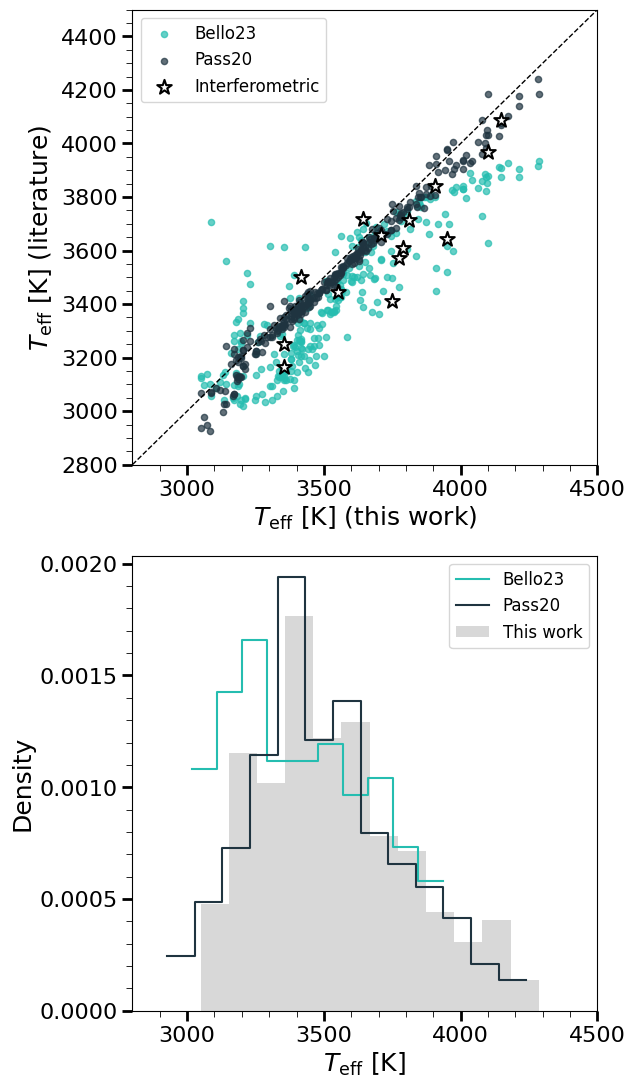

In [5]:
fig, (ax1, ax2) = plt.subplots(figsize=(6,13),nrows=2,ncols=1)

ax1.set_xlabel('$T_{\mathrm{eff}}$ [K] (this work)',fontsize=18)
ax1.set_ylabel('$T_{\mathrm{eff}}$ [K] (literature)',fontsize=18)
ax1.set_xlim(left=2800,right=4500)
ax1.set_ylim(bottom=2800,top=4500)
ax1.tick_params(axis='both', which='major', labelsize=16,width=2,length=7)
ax1.tick_params(axis='both', which='minor', labelsize=14, length=4)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.plot(np.arange(2800,4500),np.arange(2800,4500),color='black',ls='--',lw=1)
ax1.scatter(teff_pred_dtl,teff_dtl,color='#25BDB0',s=20,alpha=0.7,label='Bello23')
ax1.scatter(teff_carm_pred,teff_dl,color='#1F3440',s=20,alpha=0.7,label='Pass20')
ax1.scatter(teff_interf_pred,teff_interf,ec='black',fc='white',s=120,lw=1.5,marker='*',label='Interferometric')

ax1.legend(fontsize=12,loc='upper left')

#----------

ax2.set_ylabel('Density',fontsize=18)
ax2.set_xlabel('$T_{\mathrm{eff}}$ [K]',fontsize=18)
ax2.set_xlim(left=2800,right=4500)
ax2.tick_params(axis='both', which='major', labelsize=16,width=2,length=7)
ax2.tick_params(axis='both', which='minor', labelsize=14, length=4)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.set_yticks([0, 0.0005, 0.001 , 0.0015, 0.002])

sns.histplot(teff_carm_pred,ax=ax2,stat='density',color='grey',alpha=0.3,lw=0,label='This work')
sns.histplot(teff_dtl,ax=ax2,stat='density',color='#25BDB0',fill=None,element='step',lw=1.5,label='Bello23')
sns.histplot(teff_dl,ax=ax2,stat='density',color='#1F3440',fill=None,element='step',lw=1.5,label='Pass20')

ax2.legend(fontsize=12,loc='upper right')

plt.subplots_adjust(wspace=0, hspace=0.20)

plt.show()

## <center> Surface gravity - Scatter Plots  (Figure 12) </center>

### CARMENES data

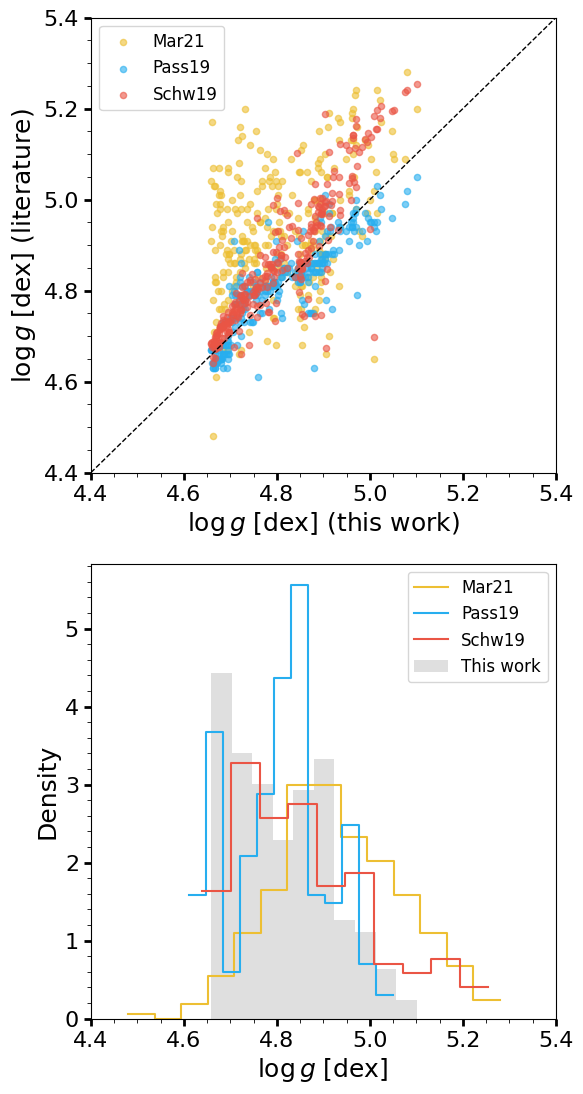

In [6]:
fig, (ax1, ax2) = plt.subplots(figsize=(6,13),nrows=2,ncols=1)

ax1.set_xlabel('log$\,g$ [dex] (this work)',fontsize=18)
ax1.set_ylabel('log$\,g$ [dex] (literature)',fontsize=18)
ax1.set_xlim(left=4.4,right=5.4)
ax1.set_ylim(bottom=4.4,top=5.4)
ax1.tick_params(axis='both', which='major', labelsize=16,width=2,length=5)
ax1.tick_params(axis='both', which='minor', labelsize=14, length=3)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.plot(np.arange(4.4,5.5,.1),np.arange(4.4,5.5,.1),color='black',ls='--',lw=1)
ax1.scatter(logg_carm_pred,logg_mar21,color='#edbf33',s=20,alpha=0.6,label='Mar21')
ax1.scatter(logg_pred_pass19,logg_pass19,color='#27aeef',s=20,alpha=0.6,label='Pass19')
ax1.scatter(logg_pred_schw19,loggc_schw19,color='#ea5545',s=20,alpha=0.6,label='Schw19')

ax1.legend(fontsize=12,loc='upper left')

#----------

ax2.set_xlabel('log$\,g$ [dex] ',fontsize=18)
ax2.set_ylabel('Density',fontsize=18)
ax2.set_xlim(left=4.4,right=5.4)
ax2.tick_params(axis='both', which='major', labelsize=16,width=2,length=5)
ax2.tick_params(axis='both', which='minor', labelsize=14, length=3)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

sns.histplot(logg_carm_pred,ax=ax2,stat='density',color='grey',alpha=0.25,lw=0,label='This work')
sns.histplot(logg_mar21,ax=ax2,stat='density',color='#edbf33',fill=None,element='step',lw=1.5,label='Mar21')
sns.histplot(logg_pass19,ax=ax2,stat='density',color='#27aeef',fill=None,element='step',lw=1.5,label='Pass19')
sns.histplot(loggc_schw19,ax=ax2,stat='density',color='#ea5545',fill=None,element='step',lw=1.5,label='Schw19')

ax2.legend(fontsize=12,loc='upper right')

plt.subplots_adjust(wspace=0, hspace=0.2)

plt.show()

### Pass20

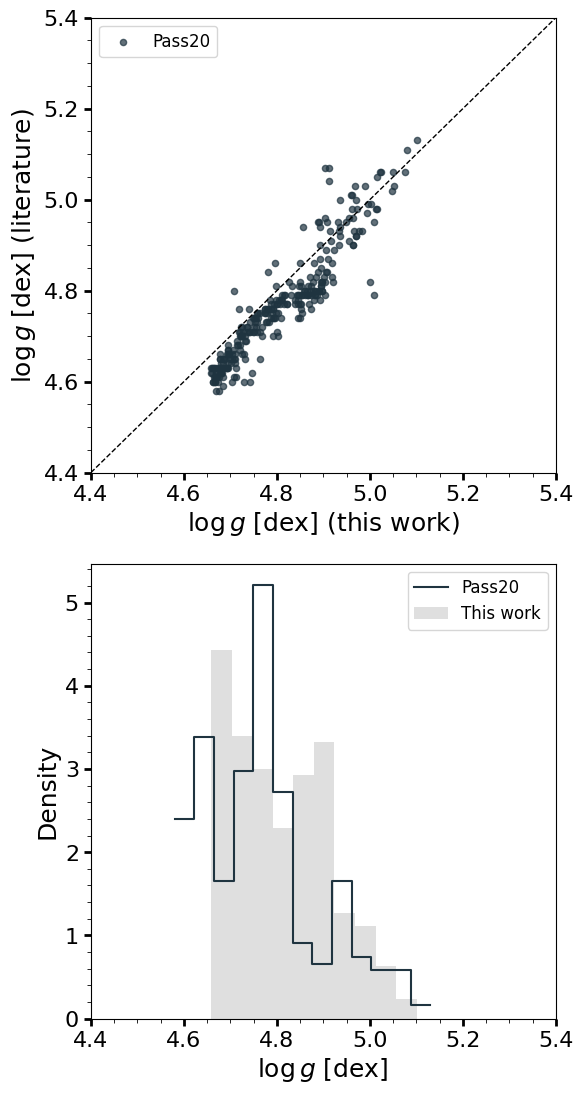

In [7]:
fig, (ax1, ax2) = plt.subplots(figsize=(6,13),nrows=2,ncols=1)

ax1.set_xlabel('log$\,g$ [dex] (this work)',fontsize=18)
ax1.set_ylabel('log$\,g$ [dex] (literature)',fontsize=18)
ax1.set_xlim(left=4.4,right=5.4)
ax1.set_ylim(bottom=4.4,top=5.4)
ax1.tick_params(axis='both', which='major', labelsize=16,width=2,length=5)
ax1.tick_params(axis='both', which='minor', labelsize=14, length=3)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.plot(np.arange(4.4,5.5,.1),np.arange(4.4,5.5,.1),color='black',ls='--',lw=1)
ax1.scatter(logg_carm_pred,logg_dl,color='#1F3440',s=20,alpha=0.7,label='Pass20')

ax1.legend(fontsize=12,loc='upper left')

#----------

ax2.set_xlabel('log$\,g$ [dex] ',fontsize=18)
ax2.set_ylabel('Density',fontsize=18)
ax2.set_xlim(left=4.4,right=5.4)
ax2.tick_params(axis='both', which='major', labelsize=16,width=2,length=5)
ax2.tick_params(axis='both', which='minor', labelsize=14, length=3)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

sns.histplot(logg_carm_pred,ax=ax2,stat='density',color='grey',alpha=0.25,lw=0,label='This work')
sns.histplot(logg_dl,ax=ax2,stat='density',color='#1F3440',fill=None,element='step',lw=1.5,label='Pass20')

ax2.legend(fontsize=12,loc='upper right')

plt.subplots_adjust(wspace=0, hspace=0.2)

plt.show()

## <center> Metallicity - Scatter Plots  (Figure 13) </center>

### CARMENES data

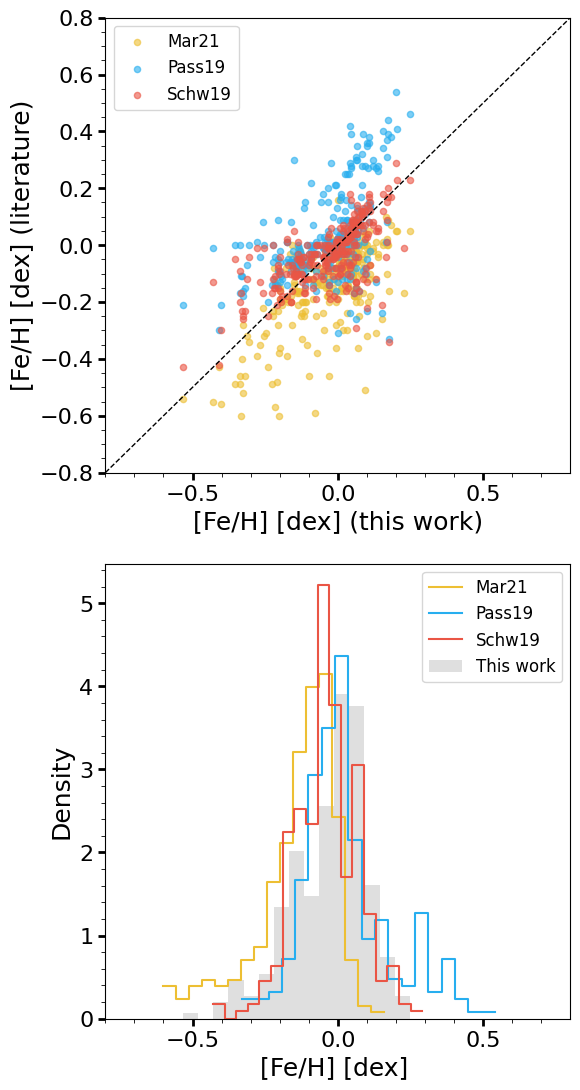

In [8]:
fig, (ax1, ax2) = plt.subplots(figsize=(6,13),nrows=2,ncols=1)

ax1.set_xlabel('[Fe/H] [dex] (this work)',fontsize=18)
ax1.set_ylabel('[Fe/H] [dex] (literature)',fontsize=18)
ax1.set_xlim(left=-0.8,right=.8)
ax1.set_ylim(bottom=-0.8,top=.8)
ax1.tick_params(axis='both', which='major', labelsize=16,width=2,length=5)
ax1.tick_params(axis='both', which='minor', labelsize=14, length=3)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.plot(np.arange(-0.8,.9,.1),np.arange(-0.8,.9,.1),color='black',ls='--',lw=1)
ax1.scatter(mh_carm_pred,mh_mar21,color='#edbf33',s=20,alpha=0.6,label='Mar21')
ax1.scatter(mh_pred_pass19,mh_pass19,color='#27aeef',s=20,alpha=0.6,label='Pass19')
ax1.scatter(mh_pred_schw19,mh_schw19,color='#ea5545',s=20,alpha=0.6,label='Schw19')

ax1.legend(fontsize=12,loc='upper left')
#----------

ax2.set_xlabel('[Fe/H] [dex] ',fontsize=18)
ax2.set_ylabel('Density',fontsize=18)
ax2.set_xlim(left=-0.8,right=.8)
ax2.tick_params(axis='both', which='major', labelsize=16,width=2,length=5)
ax2.tick_params(axis='both', which='minor', labelsize=14, length=3)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

sns.histplot(mh_carm_pred,ax=ax2,stat='density',color='grey',alpha=0.25,lw=0,label='This work')
sns.histplot(mh_mar21,ax=ax2,stat='density',color='#edbf33',fill=None,element='step',lw=1.5,label='Mar21')
sns.histplot(mh_pass19,ax=ax2,stat='density',color='#27aeef',fill=None,element='step',lw=1.5,label='Pass19')
sns.histplot(mh_schw19,ax=ax2,stat='density',color='#ea5545',fill=None,element='step',lw=1.5,label='Schw19')

ax2.legend(fontsize=12,loc='upper right')

plt.subplots_adjust(wspace=0, hspace=0.2)

plt.show()

### Bello23 & Pass20

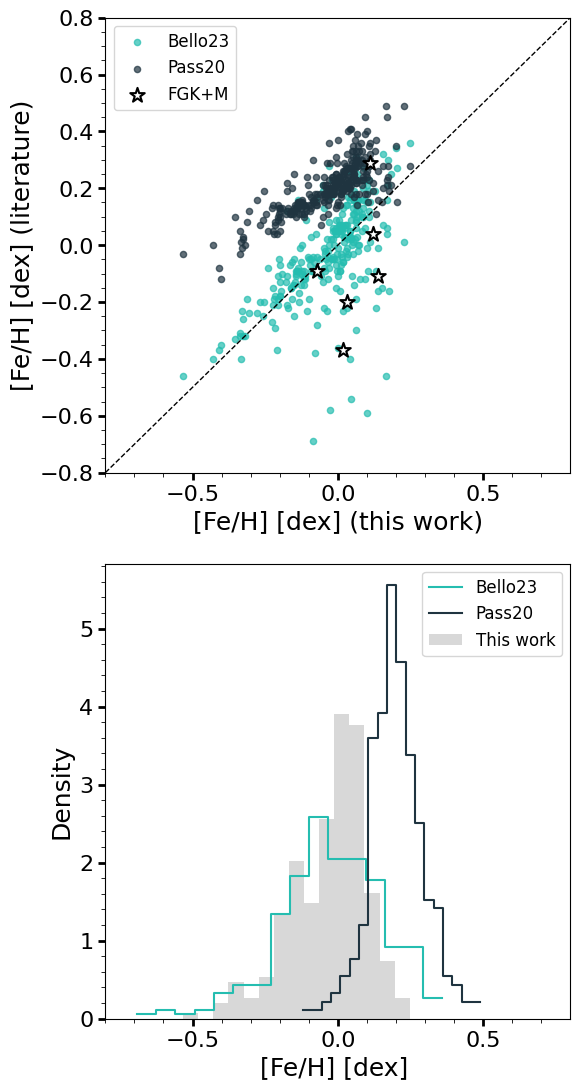

In [9]:
fig, (ax1, ax2) = plt.subplots(figsize=(6,13),nrows=2,ncols=1)

ax1.set_xlabel('[Fe/H] [dex] (this work)',fontsize=18)
ax1.set_ylabel('[Fe/H] [dex] (literature)',fontsize=18)
ax1.set_xlim(left=-0.8,right=.8)
ax1.set_ylim(bottom=-0.8,top=.8)
ax1.tick_params(axis='both', which='major', labelsize=16,width=2,length=5)
ax1.tick_params(axis='both', which='minor', labelsize=14, length=3)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.plot(np.arange(-0.8,.9,.1),np.arange(-0.8,.9,.1),color='black',ls='--',lw=1)
ax1.scatter(mh_pred_dtl,mh_dtl,color='#25BDB0',s=20,alpha=0.7,label='Bello23')
ax1.scatter(mh_carm_pred,mh_dl,color='#1F3440',s=20,alpha=0.7,label='Pass20')
ax1.scatter(mh_spec_pred,mh_spec,ec='black',fc='white',s=120,lw=1.5,marker='*',label='FGK+M')

ax1.legend(fontsize=12,loc='upper left')
#----------

ax2.set_xlabel('[Fe/H] [dex] ',fontsize=18)
ax2.set_ylabel('Density',fontsize=18)
ax2.set_xlim(left=-0.8,right=.8)
ax2.tick_params(axis='both', which='major', labelsize=16,width=2,length=5)
ax2.tick_params(axis='both', which='minor', labelsize=14, length=3)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

sns.histplot(mh_carm_pred,ax=ax2,stat='density',color='grey',alpha=0.3,lw=0,label='This work')
sns.histplot(mh_dtl,ax=ax2,stat='density',color='#25BDB0',fill=None,element='step',lw=1.5,label='Bello23')
sns.histplot(mh_dl,ax=ax2,stat='density',color='#1F3440',fill=None,element='step',lw=1.5,label='Pass20')

ax2.legend(fontsize=12,loc='upper right')

plt.subplots_adjust(wspace=0, hspace=0.2)

plt.show()

## <center> Projected rotational velocity - Scatter plot  (Figure 14) </center>

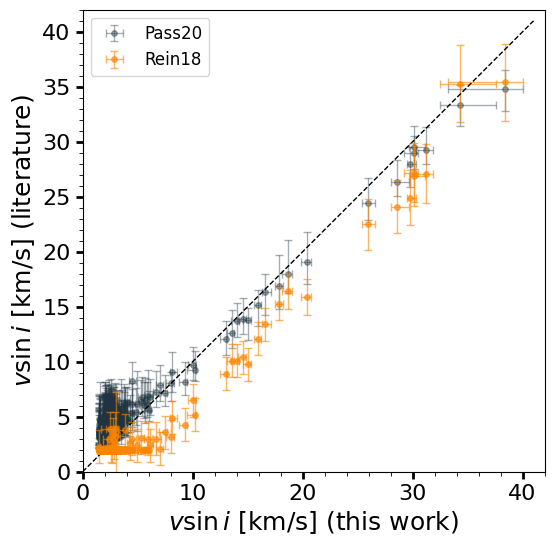

In [10]:
fig, ax1= plt.subplots(figsize=(7,6))

ax1.set_xlabel('$v\sin{i}$ [km/s] (this work)',fontsize=18)
ax1.set_ylabel('$v\sin{i}$ [km/s] (literature)',fontsize=18)
ax1.set_xlim(left=0,right=42)
ax1.set_ylim(bottom=0,top=42)
ax1.tick_params(axis='both', which='major', labelsize=16,width=2,length=5)
ax1.tick_params(axis='both', which='minor', labelsize=14, length=3)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.set_aspect('equal')

ax1.plot(np.arange(0,42),np.arange(0,42),color='black',ls='--',lw=1)
ax1.errorbar(vsini_carm_pred,vsini_dl,xerr=[vsini_err1,vsini_err2],yerr=[e_vsini_dl['vsini_err1'],e_vsini_dl['vsini_err2']],fmt='o',capsize=3,color='#1F3440',ecolor='#1F3440', zorder=0,elinewidth=1,alpha=0.4,ms=4,label='Pass20')
ax1.errorbar(vsini_carm_pred,vsini_mar21,xerr=[vsini_err1,vsini_err2],yerr=[e_vsini_mar21,e_vsini_mar21],fmt='o',capsize=3,color='#fb8500',ecolor='#fb8500', elinewidth=1,alpha=0.6,ms=4,label='Rein18')

ax1.legend(fontsize=12,loc='upper left')

plt.show()